In [7]:
import sys
sys.path.insert (0 , '/home/arpit/study/ML/github')

In [8]:
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#generating a set of random numbers
rnd = np.random.RandomState(5)                  #5 is the seed for the random generator
X_ = rnd.normal(size = (300 , 2))
X_blob = np.dot(X_ , rnd.normal(size = (2 , 2))) + rnd.normal(size = 2)

In [10]:
#using the PCA for finding the principal components
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

Text(0,0.5,'Second feature')

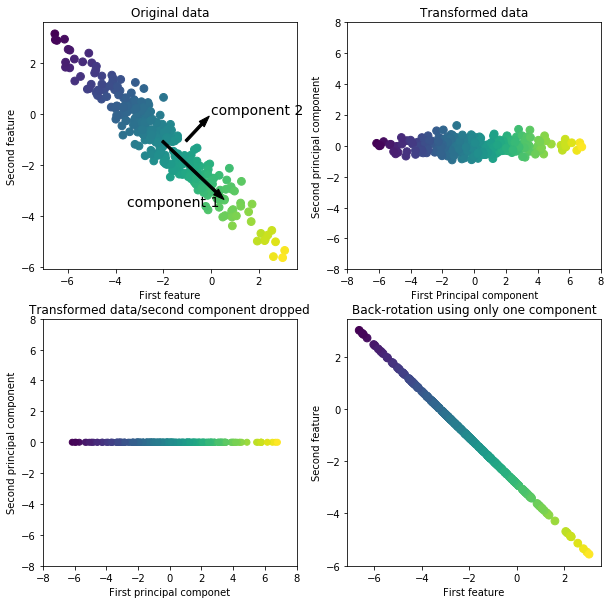

In [11]:
#plotting the graph for the illustration purpose
fig , axes = plt.subplots(2 , 2 , figsize = (10 , 10))
axes = axes.ravel()                                #this is to straight out the axes matrix

#plotting the original data
axes[0].set_title("Original data")
axes[0].set_xlabel("First feature")
axes[0].set_ylabel("Second feature")
axes[0].scatter(X_blob[: , 0] , X_blob[: , 1] , c = X_pca[: , 0], cmap = 'viridis' , s = 60)
axes[0].arrow(pca.mean_[0] , pca.mean_[1] ,3 * pca.components_[0 , 0] ,3 * pca.components_[0 , 1] , 
             width = 0.1 , head_width= 0.3 , color = 'k')
axes[0].arrow(pca.mean_[1] , pca.mean_[1] , pca.components_[1 , 0] , pca.components_[1 , 0] , 
             width = 0.1 , head_width = 0.3 , color = 'k')
axes[0].text( -3.5 , -3.6  , "component 1" , size = 14)
axes[0].text( 0 , 0  , "component 2" , size = 14)
#axes[0].set_aspect('equal')

#plotting the X_pca data
#In this , both the principal components will align along the x and y axis respectively
axes[1].set_title("Transformed data")
axes[1].scatter(X_pca[: , 0] , X_pca[: , 1] , c = X_pca[: , 0] , cmap = 'viridis' , s = 60)
axes[1].set_xlim (-8 , 8)
axes[1].set_ylim(-8 , 8)
axes[1].set_xlabel("First Principal component")
axes[1].set_ylabel("Second principal component")
#it may be noted that before transformation , the mean is substracted from the data , so the data is centered around 0,0

#plotting the points along the first component only
axes[2].set_title("Transformed data/second component dropped")
axes[2].scatter(X_pca[: , 0] , np.zeros(X_pca[: , 0].shape) , c = X_pca[: , 0] , cmap = 'viridis')
axes[2].set_xlim(-8 , 8)
axes[2].set_ylim(-8 , 8)
axes[2].set_xlabel("First principal componet")
axes[2].set_ylabel("Second principal component")

#plotting in the feature space
axes[3].set_title("Back-rotation using only one component")
pca2 = PCA(n_components = 1)
pca2.fit(X_blob)
X_pca = pca2.transform(X_blob)
X_inverse = pca2.inverse_transform(X_pca)

axes[3].scatter(X_inverse[: , 0] , X_inverse[: , 1] , c = X_pca[: , 0] , cmap = 'viridis' , s = 60)
axes[3].set_xlabel("First feature")
axes[3].set_ylabel("Second feature")

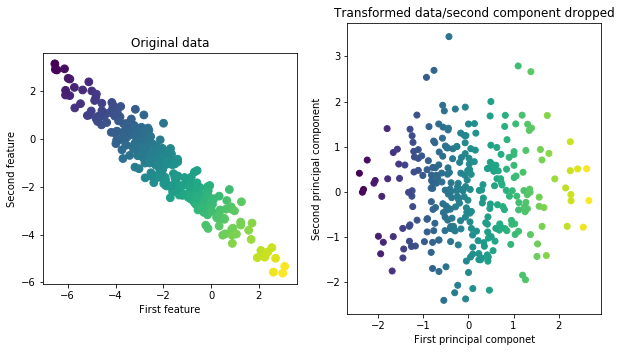

In [24]:
#visualising the whitening effect
pca3 = PCA (whiten = True)
pca3.fit(X_blob)
X_pca = pca3.transform(X_blob)
fig , axes = plt.subplots (1 , 2 , figsize = (10, 10))
axes = axes.ravel()

axes[0].set_title("Original data")
axes[0].set_xlabel("First feature")
axes[0].set_ylabel("Second feature")
axes[0].scatter(X_blob[: , 0] , X_blob[: , 1] , c = X_pca[: , 0], cmap = 'viridis' , s = 60)
axes[0].set_aspect('equal')

#plotting the points along the first component only
axes[1].set_title("Transformed data/second component dropped")
axes[1].scatter(X_pca[: , 0] , X_pca[: , 1] , c = X_pca[: , 0] , cmap = 'viridis')
axes[1].set_xlabel("First principal componet")
axes[1].set_ylabel("Second principal component")
axes[1].set_aspect('equal')
#It rescales the principal components to have the same scale
